### stripplot for fdgs and nhanes. It just creates a few imputation with sample to show the plotting.

In [1]:
import pandas as pd
from plots import stripplot

def create_imputed_datasets(df, n_imputations=5):
    """
    Creates missing data pattern and multiple imputed datasets using random sampling.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame with potential missing values
    n_imputations : int, optional
        Number of imputed datasets to create. Default is 5
        
    Returns:
    --------
    tuple
        (missing_pattern, imputed_datasets) where:
        - missing_pattern is a DataFrame showing missing (0) vs observed (1) values
        - imputed_datasets is a list of n_imputations imputed DataFrames
    """
    # Create missing data pattern df (0=missing, 2=observed)
    missing_pattern = pd.DataFrame(index=df.index, columns=df.columns)
    for col in df.columns:
        missing_pattern[col] = df[col].isna().map({True: 0, False: 1})
    
    # Create imputed datasets
    imputed_datasets = []
    for i in range(n_imputations):
        # Create a copy of original data
        imputed_df = df.copy()
        
        # Impute each column with missing values
        for col in df.columns:
            missing_mask = missing_pattern[col] == 0
            if missing_mask.any():
                imputed_df.loc[missing_mask, col] = imputed_df[col].dropna().sample(
                    n=missing_mask.sum(),
                    replace=True
                ).values
                
        imputed_datasets.append(imputed_df)
        
    return missing_pattern, imputed_datasets

### Creating imputations

In [ ]:
fdgs = pd.read_csv("../data/fdgs.csv")

na_counts = fdgs.isna().sum()

print("Number of NAs in each column:")
for col, count in na_counts.items():
    print(f"{col}: {count}")

# Drop z-score columns
fdgs = fdgs.drop(['hgt.z', 'wgt.z', 'id'], axis=1)

# Create imputed datasets
missing_pattern, imputed_datasets = create_imputed_datasets(fdgs)

print("\nCreated imputed datasets")
print(f"Type of imputed_datasets: {type(imputed_datasets)}")
print(f"Type of each element in imputed_datasets {type(imputed_datasets[0])}")
print(f"Number of imputed datasets: {len(imputed_datasets)}")
print("\nShape of each imputed dataset:")
for i, df in enumerate(imputed_datasets):
    print(f"Dataset {i+1}: {df.shape}")
print("\nColumns in each dataset:", imputed_datasets[0].columns.tolist())


nhanes = pd.read_csv("../data/nhanes.csv")

na_counts = nhanes.isna().sum()

print("Number of NAs in each column:")
for col, count in na_counts.items():
    print(f"{col}: {count}")

# Create imputed datasets
missing_pattern_nh, imputed_datasets_nh = create_imputed_datasets(nhanes)

print("\nCreated imputed datasets")
print("\nColumns in each dataset:", imputed_datasets_nh[0].columns.tolist())


Number of NAs in each column:
id: 0
reg: 0
age: 0
sex: 0
hgt: 23
wgt: 20
hgt.z: 23
wgt.z: 20

Created 5 imputed datasets
Missing height indices: [272, 2033, 2484, 2572, 2835, 2968, 3034, 3191, 3315, 3322, 3538, 3539, 4297, 4447, 4509, 4560, 5537, 6845, 6868, 7009, 7072, 8580, 8596]
Missing weight indices: [274, 1277, 1418, 2134, 2683, 2939, 3068, 3188, 3542, 4261, 5686, 6484, 7100, 7107, 7505, 8063, 8064, 8066, 8097, 8587]
Type of imputed_datasets: <class 'list'>
Type of each element in imputed_datasets <class 'pandas.core.frame.DataFrame'>
Number of imputed datasets: 5

Shape of each imputed dataset:
Dataset 1: (10030, 5)
Dataset 2: (10030, 5)
Dataset 3: (10030, 5)
Dataset 4: (10030, 5)
Dataset 5: (10030, 5)

Columns in each dataset: ['reg', 'age', 'sex', 'hgt', 'wgt']
Number of NAs in each column:
age: 0
bmi: 9
hyp: 8
chl: 10

Created 5 imputed datasets

Columns in each dataset: ['age', 'bmi', 'hyp', 'chl']


### Displaying diagnostic plots

/Users/zhannalopuliak/miniconda3/envs/new_mice/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/zhannalopuliak/miniconda3/envs/new_mice/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


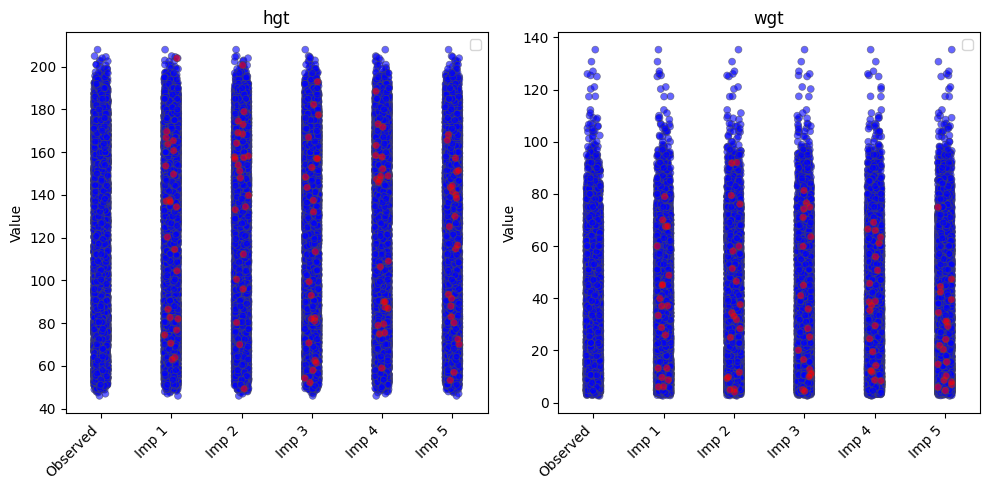

/Users/zhannalopuliak/miniconda3/envs/new_mice/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


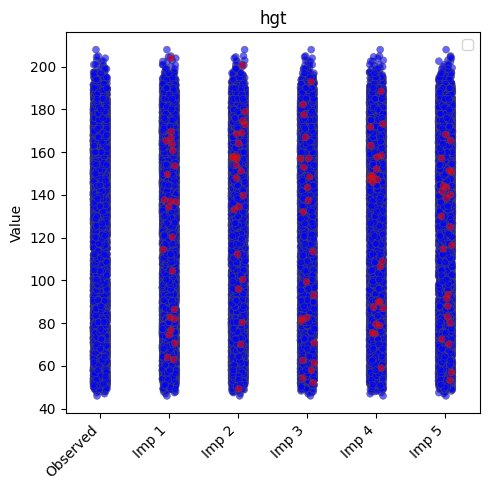

In [3]:
stripplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern)

stripplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern,
          columns=['hgt'])

/Users/zhannalopuliak/miniconda3/envs/new_mice/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/zhannalopuliak/miniconda3/envs/new_mice/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/U

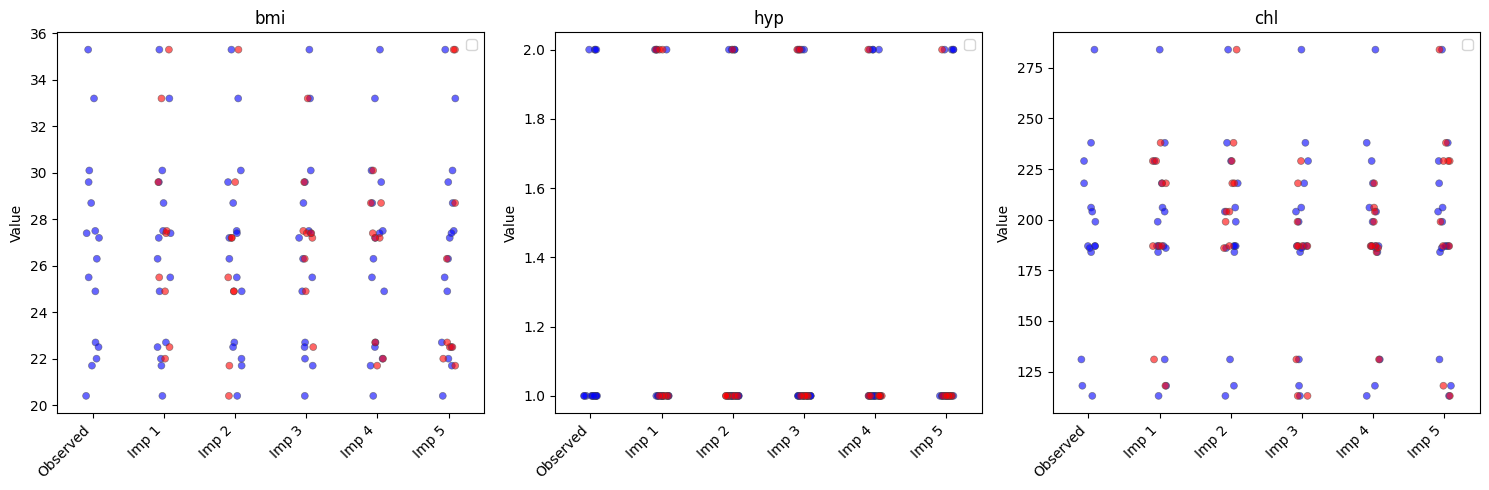

/Users/zhannalopuliak/miniconda3/envs/new_mice/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/zhannalopuliak/miniconda3/envs/new_mice/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


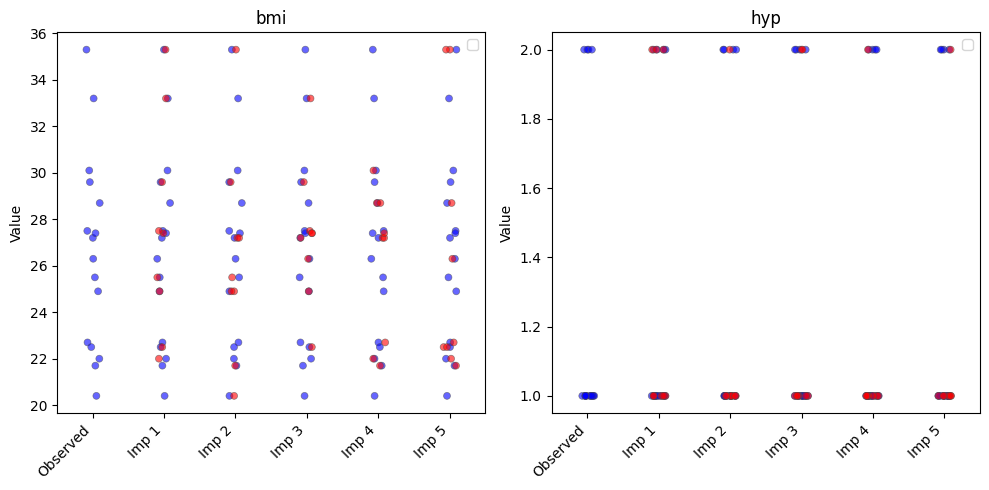

In [4]:
stripplot(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh)

stripplot(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh,
          columns=['bmi', 'hyp'])